### Dependencies

In [553]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import os

# wav

In [554]:
wav = r'.\wavfile\v-10-10-1-10.wav' # Original file
(file_dir, file_id) = os.path.split(wav)

print("Path : ", file_dir)
print("Name : ", file_id)

Path :  .\wavfile
Name :  v-10-10-1-10.wav


In [555]:
sample_rate, data = wavfile.read(wav) # sr : sampling rate, x : wave data array

print("Sample rate:{0}, data size:{1}, duration:{2} seconds".format(sample_rate,data.shape,len(data)/sample_rate))

Sample rate:44100, data size:(176448,), duration:4.001088435374149 seconds


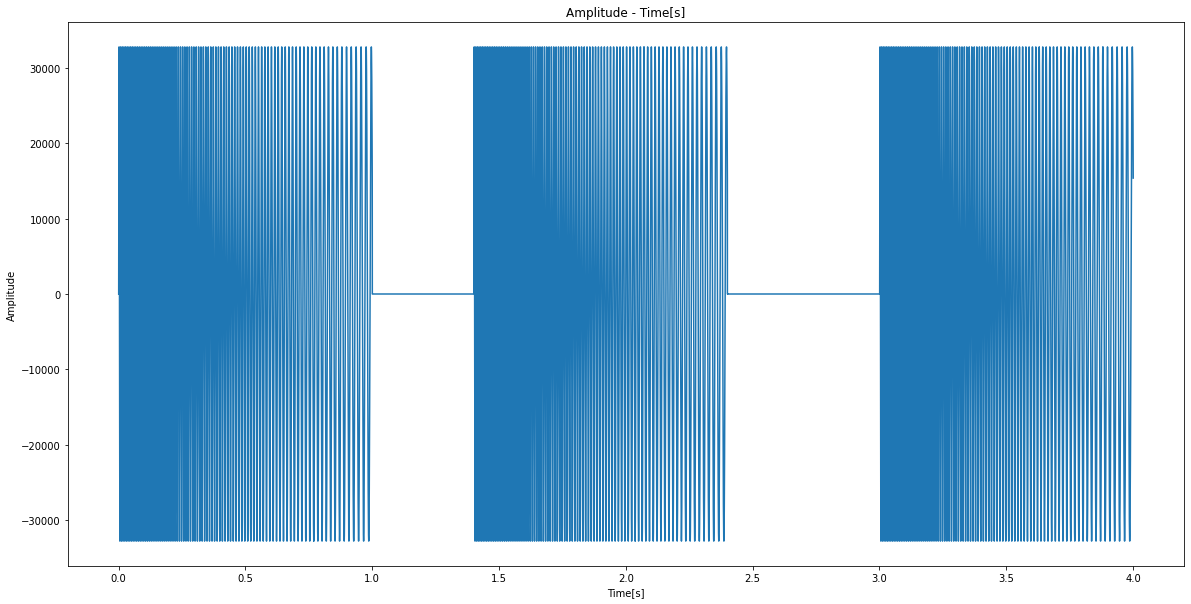

In [556]:
time = np.linspace(0, len(data)/sample_rate, len(data))

plt.figure(figsize=(20,10))
plt.plot(time, data)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

Text(0.5, 1.0, 'Power spectrum')

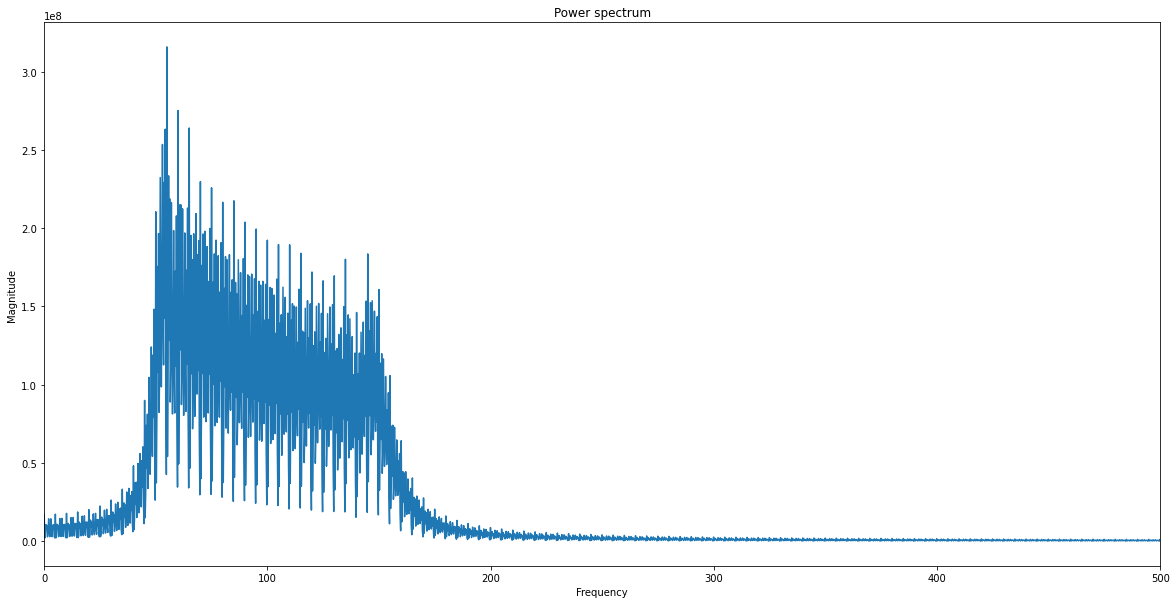

In [557]:
fft = np.fft.fft(data)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude), endpoint=False)
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlim(0,500)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

# Envelope

In [558]:
duration = 4
point = np.array([0, 1, 1.4, 2.4, 3, 4])
amp = np.array([1, 0, 1, 0, 1, 0])
sampling_rate = 1000    #Hz


pint_sample = point * sampling_rate

time = np.linspace(0, duration, int(sampling_rate*duration))

print(pint_sample, amp)
print(len(time))

[   0. 1000. 1400. 2400. 3000. 4000.] [1 0 1 0 1 0]
4000


In [559]:
# amp_list = []

# n = 0

# for i in range(len(time)):   
#     if n == len(point):
#         break
#     elif i >= pint_sample[n] and i < pint_sample[n+1]:
#         amp_list.append(amp[n])
#     else:
#         n += 1
#         amp_list.append(amp[n])

In [560]:
amp_list = []

n = 0

for i in range(len(time)):   
    if n == len(point):
        break
    elif i >= pint_sample[n] and i < pint_sample[n+1]:
        
        if amp[n] < amp[n+1]:
            temp = 0
        else:
            temp = amp[n] - (((amp[n] - amp[n+1]) / (pint_sample[n+1] - pint_sample[n])) * (i - pint_sample[n]))**2
        
        amp_list.append(temp)
    else:
        n += 1
        
        if amp[n] < amp[n+1]:
            temp = 0
        else:
            temp = amp[n] - (((amp[n] - amp[n+1]) / (pint_sample[n+1] - pint_sample[n])) * (i - pint_sample[n]))**2
        
        amp_list.append(temp)

In [561]:
# len(signal)

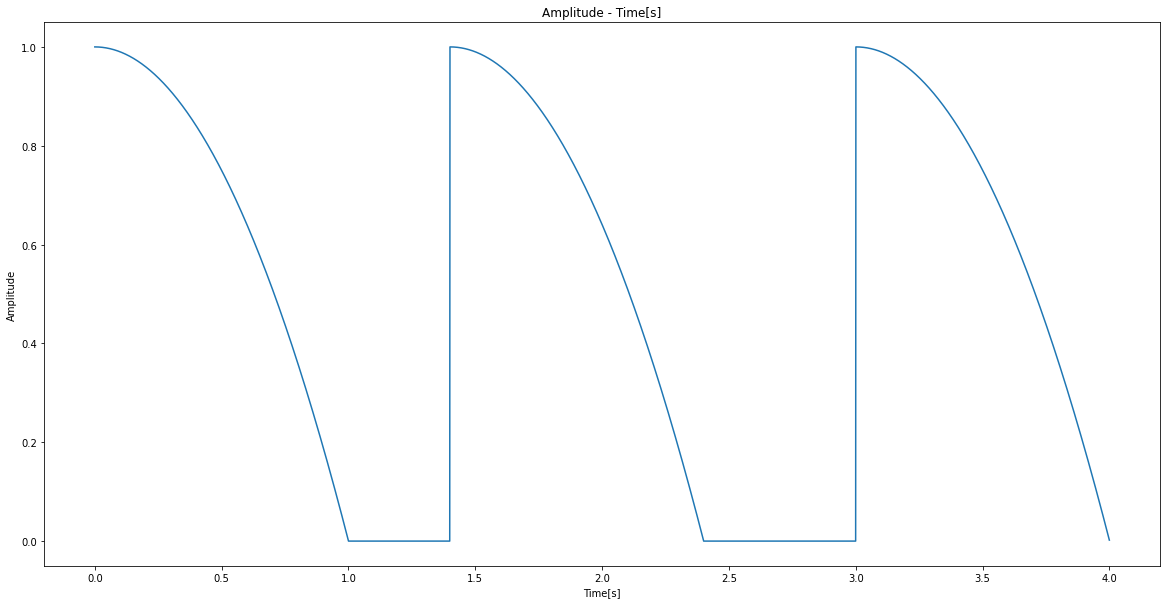

In [562]:
plt.figure(figsize=(20,10))
plt.plot(time, amp_list)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [563]:
# f_value = 0.17 # 150Hz
f_value = 0.35 # 180Hz

freq = np.array([f_value, -1, f_value, -1, f_value, -1])
point = np.array([0, 1, 1.4, 2.4, 3, 4])

print(pint_sample, freq)
print(len(time))

[   0. 1000. 1400. 2400. 3000. 4000.] [ 0.35 -1.    0.35 -1.    0.35 -1.  ]
4000


In [564]:
freq_list = []

n = 0

for i in range(len(time)):   
    if n == len(point):
        break
    elif i >= pint_sample[n] and i < pint_sample[n+1]:
        if freq[n] < freq[n+1]:
            temp = -1
        else:
            temp = freq[n] - ((freq[n] - freq[n+1]) / (pint_sample[n+1] - pint_sample[n])) * (i - pint_sample[n])
            
        freq_list.append(temp)
    else:
        n += 1
        
        if freq[n] < freq[n+1]:
            temp = -1
        else:
            temp = freq[n] - ((freq[n] - freq[n+1]) / (pint_sample[n+1] - pint_sample[n])) * (i - pint_sample[n])
            
        freq_list.append(temp)

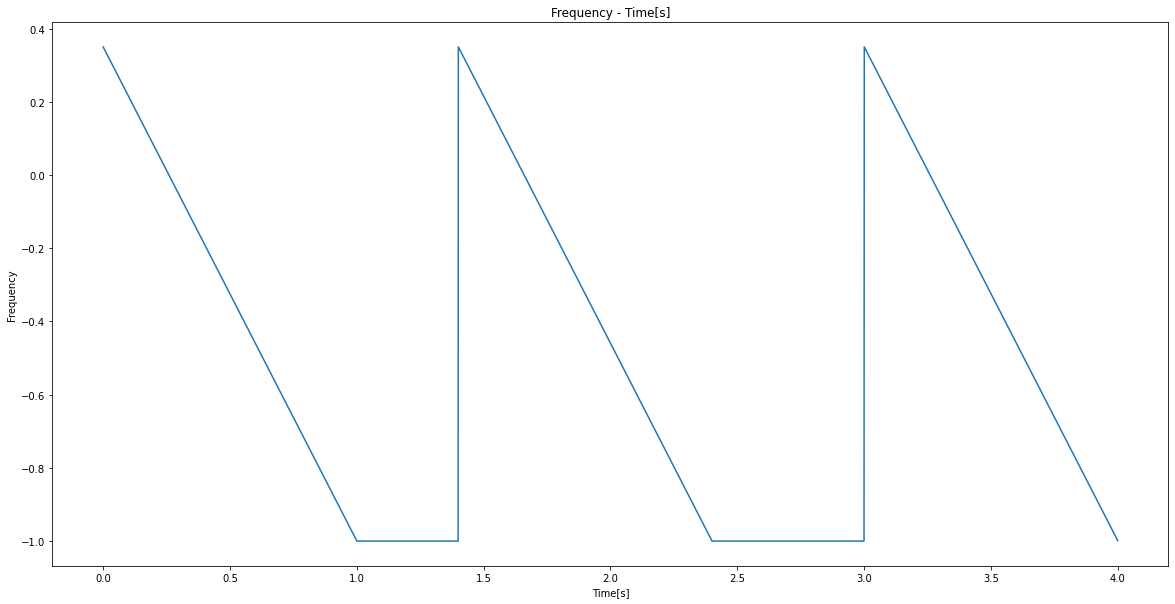

In [565]:
plt.figure(figsize=(20,10))
plt.plot(time, freq_list)
plt.ylabel("Frequency")
plt.xlabel("Time[s]")
plt.title("Frequency - Time[s]")
plt.show()

# Gen

In [566]:
def vib_to_ahap(amp_list, freq_list):
    from decimal import Decimal
    from copy import deepcopy


    file_template = {
        "Version": 1,
        "Pattern": [
            {
                "ParameterCurve": {
                    "ParameterID": "HapticIntensityControl",
                    "Time": 0.0,
                    "ParameterCurveControlPoints": [
                    ]
                }
            }

        ]
    }
    
    intensity_template = {
                            "Time": 0,
                            "ParameterValue": 0
                        }

    for t in range(len(amp_list)):
        intensity = deepcopy(intensity_template)
        intensity['Time'] = float(t / sampling_rate)
        intensity['ParameterValue'] = amp_list[t]
        file_template['Pattern'][0]['ParameterCurve']['ParameterCurveControlPoints'].append(intensity)
        
        
    ##############
    
    sharpness_template = {
                "ParameterCurve": {
                    "ParameterID": "HapticSharpnessControl",
                    "Time": 0.0,
                    "ParameterCurveControlPoints": []
                }
            }
        
    frequency_template = {
                            "Time": 0,
                            "ParameterValue": 0
                        }    
    
    for t in range(len(freq_list)):
        frequency = deepcopy(frequency_template)
        frequency['Time'] = float(t / sampling_rate)
        frequency['ParameterValue'] = freq_list[t]
        sharpness_template['ParameterCurve']['ParameterCurveControlPoints'].append(frequency)
        
        

    file_template['Pattern'].append(sharpness_template)    
    
    
    
    ######

    event_template = { 
        "Event": {
            "Time": 0,
            "EventType": "HapticContinuous",
            "EventDuration": float(1 / sampling_rate),
            "EventParameters": [{
                "ParameterID": "HapticIntensity",
                "ParameterValue": 0
            }, 
            # {
            #     "ParameterID": "HapticSharpness",
            #     "ParameterValue": 0
            # }
            ]
        }
    }

    event = deepcopy(event_template)
    event['Event']['Time'] = 0
    event['Event']['EventDuration'] = float(len(amp_list) / sampling_rate)
    event['Event']['EventParameters'][0]['ParameterValue'] = 1
    file_template['Pattern'].append(event)

    return file_template


def generate_ahap_files():
    vibrations = vib_to_ahap(amp_list, freq_list)

    return vibrations


In [567]:
def write_ahap_files(vib_dict):
    import json

    for name in vib_dict: 
        with open(f'./{name}.ahap', 'w') as file:
            json.dump(json.loads(
                json.dumps( vib_dict[name]['AHAP']), parse_float = lambda x: round(float(x), 4)
            ), file)

In [568]:
import json

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [569]:
import json

vibration_dict = generate_ahap_files()
vibration_dict
# display()

# write_ahap_files(vibration_dict)
with open("./v-10-10-1-10.ahap", "w") as f: json.dump(vibration_dict, f, cls=NpEncoder)
    
# with open(f"./v-10-10-1-10.ahap", 'w') as file:
#             json.dump(json.loads(
#                 json.dumps(vibration_dict), parse_float = lambda x: round(float(x), 4)
#             ), file)

##### Parameter Configuration

In [570]:
sampling_rate = 1000    #Hz
# carrier_f = [80, 155, 230] #Hz
# envelope_f = [0, 8]        #Hz
# duration = [300, 2000]     #ms

carrier_f = [80, 100, 230]
envelope_f = [0, 8]
duration = [300, 2000]

# frequency_mapping = [0, 0.39, 1]
frequency_mapping = [-1, -0.22, 1]

##### Yoonjae's Expressions

In [571]:
def vibration_fn(cf, ef, dur): 
    break_points = np.linspace(0, float(dur / 1000), int(dur * sampling_rate / 1000), endpoint = False)
    
    if ef == 0:
#         return abs(np.sin(2 * np.pi * cf * break_points))
        return [1 for i in range(len(break_points))]

    return abs(np.sin(2 * np.pi * ef * break_points))
    #     return abs(np.sin(2 * np.pi * ef * break_points) * np.sin(2 * np.pi * cf * break_points))


def generate_vibrations():
    vib_dict = {}

    def vib_gen(): 
        for cf in carrier_f:
            for ef in envelope_f:
                for t in duration:
                    yield(cf, ef, t, vibration_fn(cf, ef, t))


    for cf, ef, t, vibration in vib_gen():
        vib_dict[f'v-{cf}-{ef}-{t}'] = {
            'Vibration': vibration
        }

    return vib_dict

In [572]:
def vibration_fn(cf, ef, dur): 
    break_points = np.linspace(0, float(dur / 1000), int(dur * sampling_rate / 1000), endpoint = False)
    
    if cf == 80:
        amplitude = 1
    elif cf == 100:
        amplitude = 0.85
    # elif cf == 155:
    #     amplitude = 0.51
    elif cf == 230:
        amplitude = 0.318
    
    if ef == 0:
#         return abs(np.sin(2 * np.pi * cf * break_points))
        return [amplitude*1 for i in range(len(break_points))]

    return abs(amplitude * np.sin(2 * np.pi * ef * break_points))
    #     return abs(np.sin(2 * np.pi * ef * break_points) * np.sin(2 * np.pi * cf * break_points))


def generate_vibrations():
    vib_dict = {}

    def vib_gen(): 
        for cf in carrier_f:
            for ef in envelope_f:
                for t in duration:
                    yield(cf, ef, t, vibration_fn(cf, ef, t))


    for cf, ef, t, vibration in vib_gen():
        vib_dict[f'v-{cf}-{ef}-{t}'] = {
            'Vibration': vibration
        }

    return vib_dict

##### Plot Visualization

In [573]:
def visualize_vibrations(name, break_points): 
    fig = plt.figure(figsize = (12, 1))
    plt.plot(break_points)
    plt.title(name)
    ########################
    plt.ylim(0, 1.1)
    ########################
    plt.show()

def display():
    for name, entry in generate_vibrations().items():
        visualize_vibrations(name, entry['Vibration'])

#### AHAP File Generation

In [574]:
def vib_to_ahap(vib_name, entry):
    from decimal import Decimal
    from copy import deepcopy

    cf = int(vib_name.split('-')[1])

    if cf == 100:
        cf = frequency_mapping[1]
    elif cf == 230:
        cf = frequency_mapping[2]
    else:
        cf = frequency_mapping[0]

    file_template = {
        "Version": 1,
        "Pattern": [
            {
                "ParameterCurve": {
                    "ParameterID": "HapticIntensityControl",
                    "Time": 0.0,
                    "ParameterCurveControlPoints": [
                    ]
                }
            }

        ]
    }
    
    intensity_template = {
                            "Time": 0,
                            "ParameterValue": 0
                        }

    for t in range(len(entry)):
        intensity = deepcopy(intensity_template)
        intensity['Time'] = float(t / sampling_rate)
        intensity['ParameterValue'] = entry[t]
        file_template['Pattern'][0]['ParameterCurve']['ParameterCurveControlPoints'].append(intensity)
        
    sharpness_template = {
                "ParameterCurve": {
                    "ParameterID": "HapticSharpnessControl",
                    "Time": 0.0,
                    "ParameterCurveControlPoints": [
                        {
                            "Time": 0,
                            "ParameterValue": cf
                        },
                        {
                            "Time": float(len(entry) / sampling_rate),
                            "ParameterValue": cf
                        }
                    ]
                }
            }

    file_template['Pattern'].append(sharpness_template)    

    event_template = { 
        "Event": {
            "Time": 0,
            "EventType": "HapticContinuous",
            "EventDuration": float(1 / sampling_rate),
            "EventParameters": [{
                "ParameterID": "HapticIntensity",
                "ParameterValue": 0
            }, 
            # {
            #     "ParameterID": "HapticSharpness",
            #     "ParameterValue": 0
            # }
            ]
        }
    }

    event = deepcopy(event_template)
    event['Event']['Time'] = 0
    event['Event']['EventDuration'] = float(len(entry) / sampling_rate)
    event['Event']['EventParameters'][0]['ParameterValue'] = 1
    file_template['Pattern'].append(event)

    return file_template


def generate_ahap_files():
    vibrations = generate_vibrations()

    for name in vibrations:
        vibrations[name]['AHAP'] = vib_to_ahap(name, vibrations[name]['Vibration'])

    return vibrations


##### Write to File System

In [575]:
def write_ahap_files(vib_dict):
    import json

    for name in vib_dict: 
        with open(f'./{name}.ahap', 'w') as file:
            json.dump(json.loads(
                json.dumps( vib_dict[name]['AHAP']), parse_float = lambda x: round(float(x), 4)
            ), file)

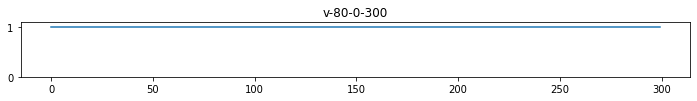

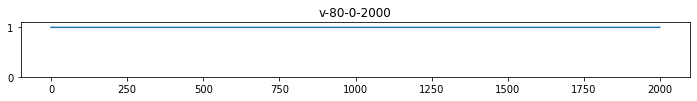

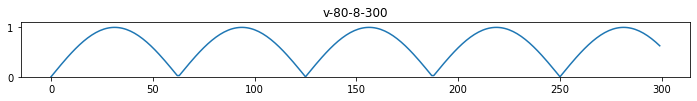

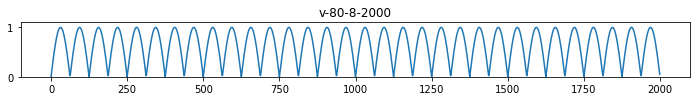

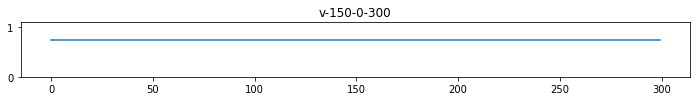

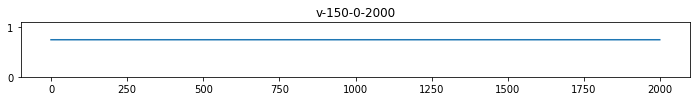

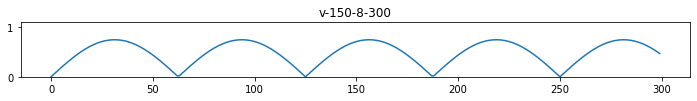

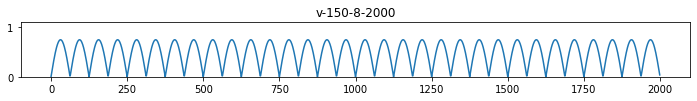

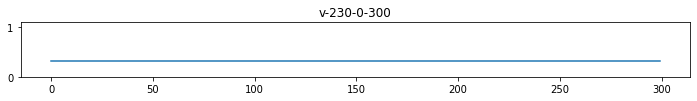

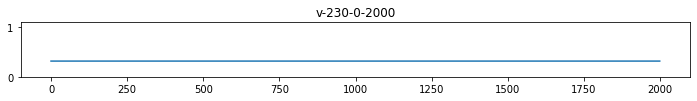

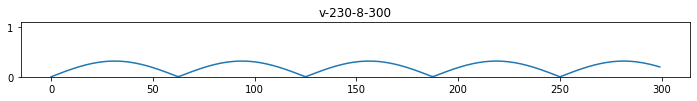

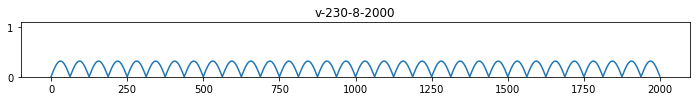

In [576]:
vibration_dict = generate_ahap_files()
display()

write_ahap_files(vibration_dict)